# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
per_city_types = pyber_data_df.set_index(["type"])

In [4]:
df = pd.DataFrame(per_city_types)

In [5]:
#  1. Get the total rides for each city type
ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]

In [6]:
# 2. Get the total drivers for each city type
driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]

In [7]:
#  3. Get the total amount of fares for each city type
total_fare = pyber_data_df.groupby(["type"]).sum()["fare"]

In [8]:
#  4. Get the average fare per ride for each city type.

avg_fare = pyber_data_df.groupby(["type"]).mean()["fare"]

In [9]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = total_fare/driver_count

In [10]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
             "Total Rides": ride_count,
                "Total Drivers": driver_count,
               "Total Fare": total_fare,
               "Average Fare per ride": avg_fare,
               "Average Fare per driver": avg_fare_per_driver})

In [11]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [12]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fare"] = pyber_summary_df["Total Fare"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per ride"] = pyber_summary_df["Average Fare per ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per driver"] = pyber_summary_df["Average Fare per driver"].map("${:,.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fare,Average Fare per ride,Average Fare per driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [13]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [14]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
date_fare_by_city_df = pyber_data_df.groupby(["type","date"]).sum()[["fare"]]
date_fare_by_city_df

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [15]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
date_fare_by_city_df = date_fare_by_city_df.reset_index()
date_fare_by_city_df.head()


,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [16]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
city_type_fare_by_date = date_fare_by_city_df.pivot(index="date", columns='type', values='fare')

In [17]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
city_type_fare_by_date.loc['2019-01-01':'2019-04-28']
#date_fare_by_city_df = date_fare_by_city_df["date"].datetime.datetime.timestamp(date)
#start_date = "2019-01-01"
#end_date = "2019-04-29"
#date_range = (city_type_fare_by_date["date"] >= start_date) & (city_type_fare_by_date["date"] <= end_date)
#fare_by_date = city_type_fare_by_date.loc[date_range]

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28


In [18]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.

city_type_fare_by_date.index = pd.to_datetime(city_type_fare_by_date.index)

In [19]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
city_type_fare_by_week = city_type_fare_by_date.resample("W").sum()
city_type_fare_by_week.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


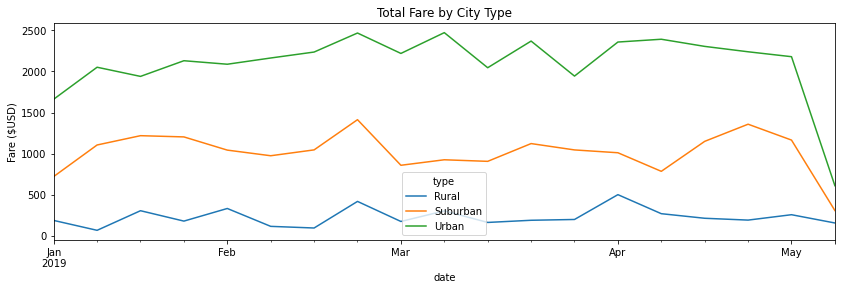

In [20]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style

city_type_fare_by_week.plot(figsize=(14,4))
plt.title("Total Fare by City Type")
plt.ylabel("Fare ($USD)")


# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.show()
